In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [3]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [4]:
x_Train_normalize = x_Train /255
x_Test_normalize = x_Test /255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()

In [40]:
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [41]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [42]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [45]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.2941 - acc: 0.9159 - val_loss: 0.1541 - val_acc: 0.9555
Epoch 2/10
 - 9s - loss: 0.1166 - acc: 0.9667 - val_loss: 0.1108 - val_acc: 0.9668
Epoch 3/10
 - 9s - loss: 0.0729 - acc: 0.9793 - val_loss: 0.0890 - val_acc: 0.9734
Epoch 4/10
 - 9s - loss: 0.0508 - acc: 0.9853 - val_loss: 0.0782 - val_acc: 0.9768
Epoch 5/10
 - 9s - loss: 0.0357 - acc: 0.9902 - val_loss: 0.0772 - val_acc: 0.9761
Epoch 6/10
 - 9s - loss: 0.0248 - acc: 0.9937 - val_loss: 0.0785 - val_acc: 0.9756
Epoch 7/10
 - 10s - loss: 0.0186 - acc: 0.9956 - val_loss: 0.0752 - val_acc: 0.9782
Epoch 8/10
 - 9s - loss: 0.0129 - acc: 0.9973 - val_loss: 0.0753 - val_acc: 0.9780
Epoch 9/10
 - 9s - loss: 0.0097 - acc: 0.9982 - val_loss: 0.0682 - val_acc: 0.9799
Epoch 10/10
 - 9s - loss: 0.0061 - acc: 0.9991 - val_loss: 0.0691 - val_acc: 0.9803


In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

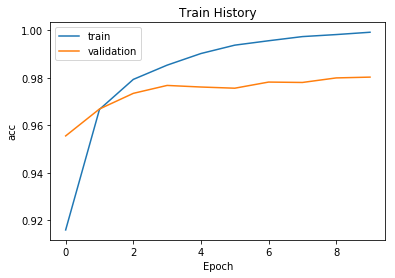

In [46]:
show_train_history(train_history,'acc','val_acc')

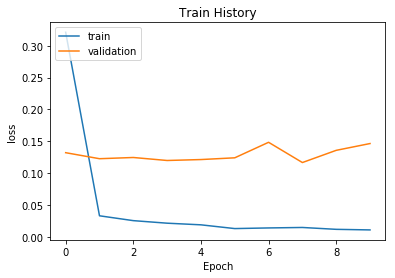

In [32]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 142us/step

accuracy= 0.9821


In [48]:
prediction=model.predict_classes(x_Test)

In [49]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels,
                                 prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction) > 0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

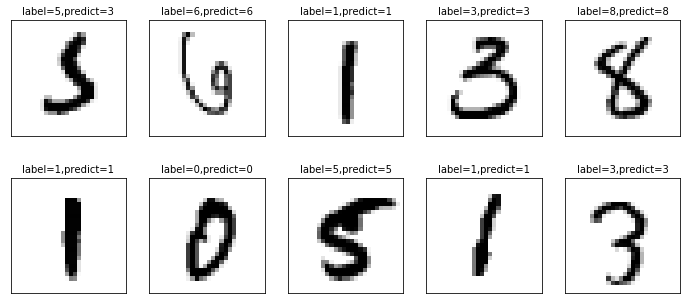

In [50]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [51]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,1,0,0,1,2,0,3,1
1,0,1125,4,1,0,1,2,0,2,0
2,3,1,1013,4,0,0,2,5,4,0
3,1,0,1,995,0,3,0,3,3,4
4,1,2,4,0,963,0,4,1,1,6
5,2,0,0,5,1,877,4,0,2,1
6,3,2,0,1,2,4,945,0,1,0
7,1,6,8,3,1,0,0,1001,2,6
8,0,0,4,8,1,1,3,2,952,3


In [52]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [53]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3


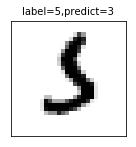

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label,
                             prediction,idx=340,num=1)